# xAI-Proj-B: A Day Semester in the Life of a Deep Learning Engineer


### Import required libraries

In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

### Load MNIST dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


2


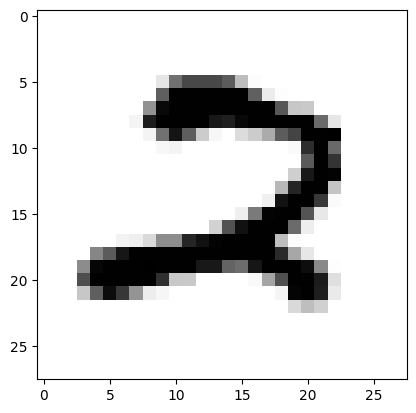

In [5]:
image_index = 9479
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


### setup model or something

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

### Train the model kuch sahi kar k likhna hy

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 51s 26ms/step - loss: 0.2127 - accuracy: 0.9363
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0846 - accuracy: 0.9732
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0585 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0425 - accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0355 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0280 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0234 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0208 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0189 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 40s 21m

### Make predictions bla bla

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0631 - accuracy: 0.9852


[0.06309620290994644, 0.9851999878883362]

### Make predictions on real-world data

1/1 [==============================] - 0s 93ms/step
2


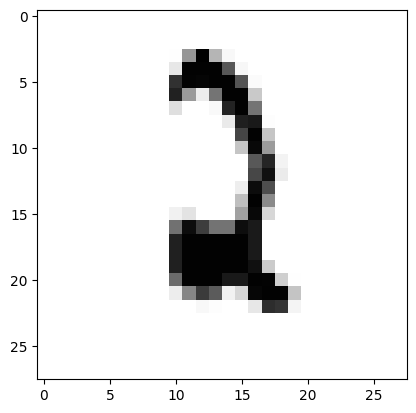

In [11]:
image_index = 1262
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

1/1 [==============================] - 0s 78ms/step
3


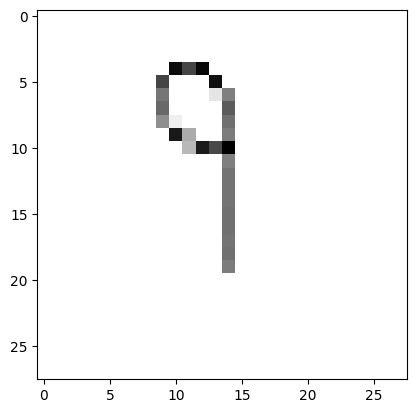

In [22]:
im3 = cv2.imread("/content/test 9.png")
im3 = np.invert(im3)
# print(im3)
im3 = im3[:, :, 0]

plt.imshow(im3.reshape(28, 28),cmap='Greys')
pred = model.predict(im3.reshape(1, 28, 28, 1))
print(pred.argmax())